In [15]:
require(ISLR)
#install.packages('ISLR') 
#require(bootstrap)

In [24]:
library(ISLR)

In [25]:
install.packages('bootstrap') 

Installing package into 'C:/Users/Diego/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'bootstrap' is in use and will not be installed"


In [26]:
require(bootstrap)

In [27]:
#cross validation (does not show)
#use require(bootstrap)
?cv.glm

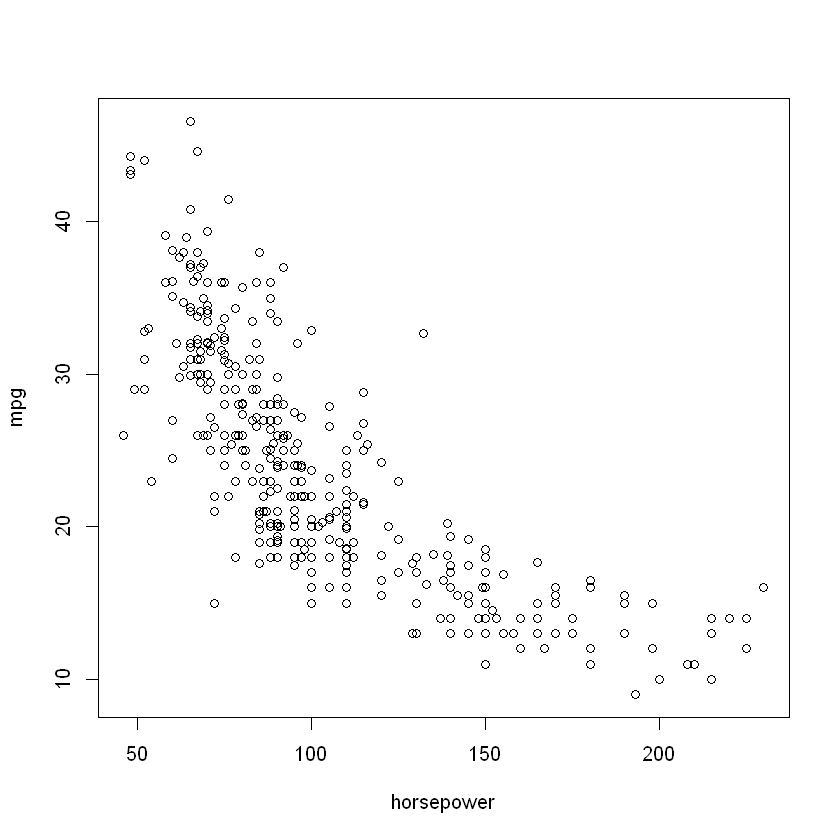

In [39]:
#plot mpg and hp
plot(mpg~horsepower, data=Auto)

### LOOCV

.have to fit model n times

.n == number of points in training points 

.can use shortcut (formula)

.cv.glm does not use shortcut b/c designed to work w/ logistic regression as well

In [40]:
#glm can fit linear and non-linear models
glm.fit<-glm(mpg~horsepower,data=Auto)

In [41]:
glm.fit


Call:  glm(formula = mpg ~ horsepower, data = Auto)

Coefficients:
(Intercept)   horsepower  
    39.9359      -0.1578  

Degrees of Freedom: 391 Total (i.e. Null);  390 Residual
Null Deviance:	    23820 
Residual Deviance: 9386 	AIC: 2363

In [42]:
require(boot)

In [43]:
#cv.glm(data, glmfit, cost, K)


#fits n times
#each time leaves ou 1 observation
#produces fit on all other data
#then makes prediction at the x value for that observation you left out

#pretty slow (does not use formula (5.2) on pg 180)
#this code does LOOCV by brute force
#refits model all those times (slow)

#delta == cross-validation prediction error

#output == 1) raw LOOCV result 2) bias correctoin
#bias correction == function that the data set we train 
#it on is slightly smaller than the one we would like
#to get the error for, full data set size of size = n 
#bias more of an effect on CROSS-FOLD validation 
cv.glm(Auto,glm.fit)$delta

[1] 24.23151 24.23114

In [38]:
#?cv.glm

In [49]:
#?residuals

In [50]:
#?lm

In [51]:
#?lm.influence

### Function  for formula (5.2)

In [45]:
#formula == sum of residuals between y and y-hat squared 
#divude by (1-Hii)^2

# Formula == (1/n)E ((yi-y-hat-i)^2)/(1-Hii)^2

#H == diagonal hat of the hat matrix 
#hat matrix == produces least sqaures fit
#H== how much i contributes to own fit

#if Hi close  to 1(contributes a lot to own fit)
#==1-Hii is small and inflate residual ?


loocv<-function(fit){
    #extracts element h
    #vector h 
    h<-lm.influence(fit)$h
    #residuals = terms in numerator (vector)
    #divide by 1-h squared (vector)
    #element by element division
    
    #square them and take the mean of that
    #computes formula
    mean((residuals(fit)/(1-h))^2)
}

### Let's try it

In [46]:
#much faster (gives biased number)
loocv(glm.fit)

[1] 24.23151

In [ ]:
#?rep

In [60]:
#see what rep does
a<- rep(0,5)
a

[1] 0 0 0 0 0

In [62]:
a[1]
a[1:5]

[1] 0

[1] 0 0 0 0 0

In [64]:
#use it 
#fit polynomials of diff degrees to data
#why? our data (the plot) is non-linear

#vector for collecting the errors
#rep == replicates values in x
#ERROR vector
cv.error <- rep(0,5)
#degree of polynomials
degree <- 1:5
#
for (d in degree){
    #apply polynomial
    #fit glm
    glm.fit<-glm(mpg~poly(horsepower,d), data=Auto)
    #apply CV to each index of cv.error
    #use our function to compute error
    #for each degree of polynomial
    #and put in ERROR vector
    cv.error[d]<-loocv(glm.fit)
}

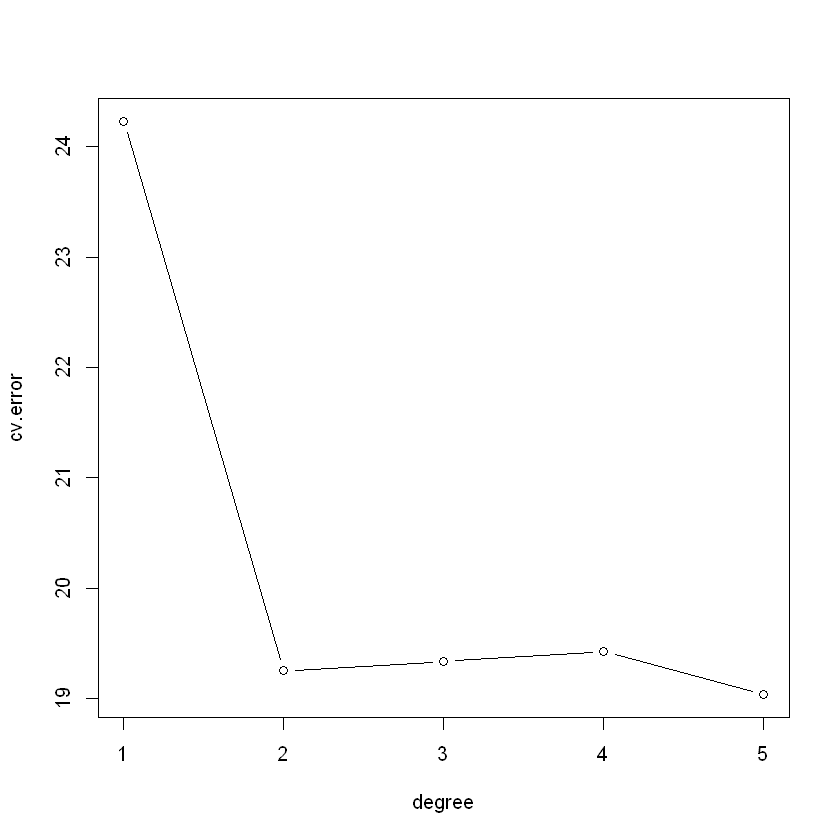

In [65]:
#degree 2 jumps from 24 to 19
#higher degrees do not make much difference
#quadratic == good 
plot(degree,cv.error,type='b')

### 10-fold Cross-validation

. do less work (divide data into 10 pieces)

.1/10 == test

.9/10 == training set

.fit model 10 times

In [66]:
#delta == cross-validation prediction error


cv.error10<-rep(0,5)
degree <- 1:5

#only fits model 10 times
for (d in degree){
    glm.fit<-glm(mpg~poly(horsepower,d), data=Auto)
    #k==10 (10 folds)
    #compute errors
    cv.error10[d]<-cv.glm(Auto,glm.fit,K=10)$delta[1] #?
}

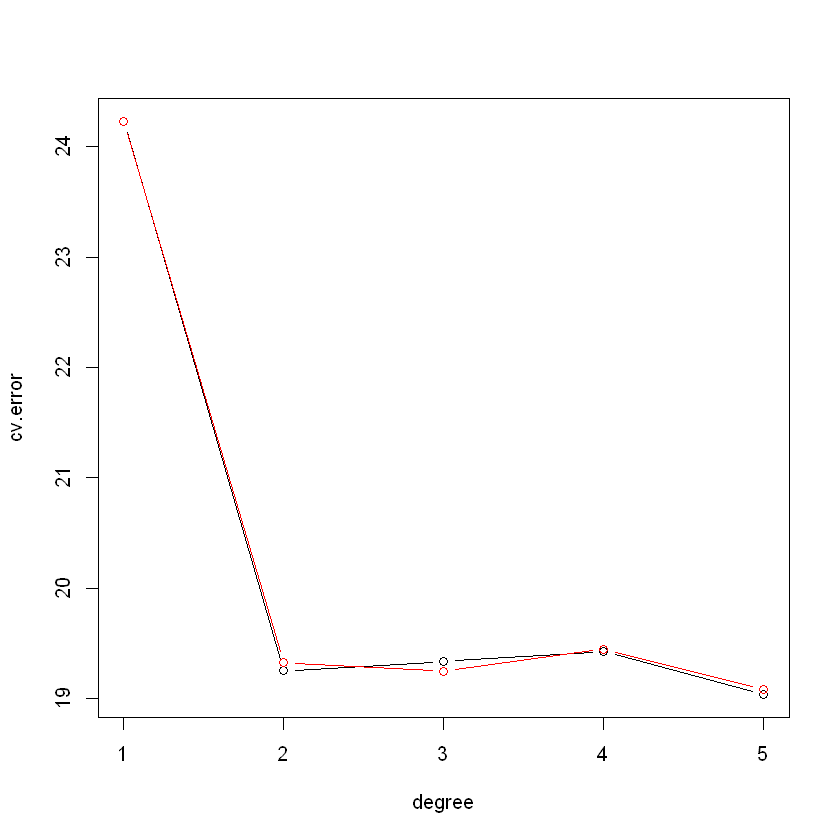

In [69]:
#include errors in our plot

#LOOCV
plot(degree,cv.error,type='b')

#10-FOLD CV
lines(degree,cv.error10,type='b',col='red')

#NOT MUCH DIFFERENCES

#10-fold best b/c==more stable == cheaper to compute

### Bootstrap
.Minimum risk investment - section 5.2 (example)

.gets you sampling distribution of statistics

.nonlinear formula

In [70]:
#given 2 vectors, x and y 
alpha<-function(x,y){
    #var of x
    vx=var(x)
    #var of y
    vy=var(y)
    #covariance of x and y
    cxy=cov(x,y)
    #alpha (minmal risk)
    (vy-cxy)/(vx+vy-2*cxy) #funct returns last line that was evaluated
}

In [80]:
#2 columns
head(Portfolio)

,X,Y
,<dbl>,<dbl>
1,-0.8952509,-0.2349235
2,-1.5624543,-0.8851760
3,-0.4170899,0.2718880
4,1.0443557,-0.7341975
5,-0.3155684,0.8419834
6,-1.7371238,-2.0371910


In [82]:
#100 rows
nrow(Portfolio)

[1] 100

In [72]:
#data set portfolio, w/ x and y
#apply function to the 2 columns in the df
alpha(Portfolio$X,Portfolio$Y)

[1] 0.5758321

### What is the standard error of alpha?

In [79]:
#wrapper to take in alpha function

#takes data frame

#takes index == rows of the df (values 1 to n;can be repeats)
#then  computes statistic==standard error (alpha index)
#computes numbers 1 to n (n of them)
#resampling w/ replacement (data point can be in multiple data sets)


#with == takes first argument of df; and the some commands

alpha.fn<-function(data, index){
    #the some commands
    #with == "using data in df, execture these commands"
    #data[index,] == gets right observations (can be resampled)
    #then compute alpha of x and y 
    #can use names X and Y, which are in the df
    with(data[index,],alpha(X,Y))
}

In [83]:
#original index of the data (100 rows)
#get same value as before
alpha.fn(Portfolio, 1:100)

[1] 0.5758321

In [84]:
#random number generation
#seed number can be any int
#computer never truly random; so use this
#use the same random numbers repeatedly
#used to reproduce research
?set.seed

In [86]:
#example

set.seed(18989)

#rnorm == psuedorandom numbers from normal dist
#10 observations
x<-rnorm(10)
#values around 0, w/ sd at 1
x

[1]  0.8338464 -1.6723160 -1.6120453  1.1178658 -0.0682753  0.4507346
 [7]  0.1592061 -1.5625536  0.2909415  0.4403541

In [87]:
#example

#numbers changed
y<-rnorm(10)
y

[1]  1.10016358  0.41487983  0.56859563  0.79680572  1.29337075 -1.60365581
 [7]  0.26255338  2.44683524  0.06671864  0.60087179

In [88]:
#now, values in x and y2 are the same
#good to run a simulation and test certain
#values repeatedly

#have to set seed before code
set.seed(18989)
y2<-rnorm(10)
y2

[1]  0.8338464 -1.6723160 -1.6120453  1.1178658 -0.0682753  0.4507346
 [7]  0.1592061 -1.5625536  0.2909415  0.4403541

In [94]:
set.seed(1)
y3<-rnorm(10)
y3

[1] -0.6264538  0.1836433 -0.8356286  1.5952808  0.3295078 -0.8204684
 [7]  0.4874291  0.7383247  0.5757814 -0.3053884

In [105]:
#run bootstrap

#get reproducable results
set.seed(1)
#give it random sample for index parameter
#sample is form 1 to 100, size 100 
#replace TRUE, something bootstrap does over and over
#bootstrap sample of size 1
alpha.fn(Portfolio,sample(1:100, 100,replace=TRUE))

[1] 0.7368375

In [98]:

#call function boot
#give it function fn
#do 1000 bootstraps
boot.out<-boot(Portfolio, alpha.fn, R=1000)
boot.out

#gives original statistic (estimate)
#estimate of bias (negligble)
#estimate of std error (one we care about)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.5758321 -0.001695873  0.09366347

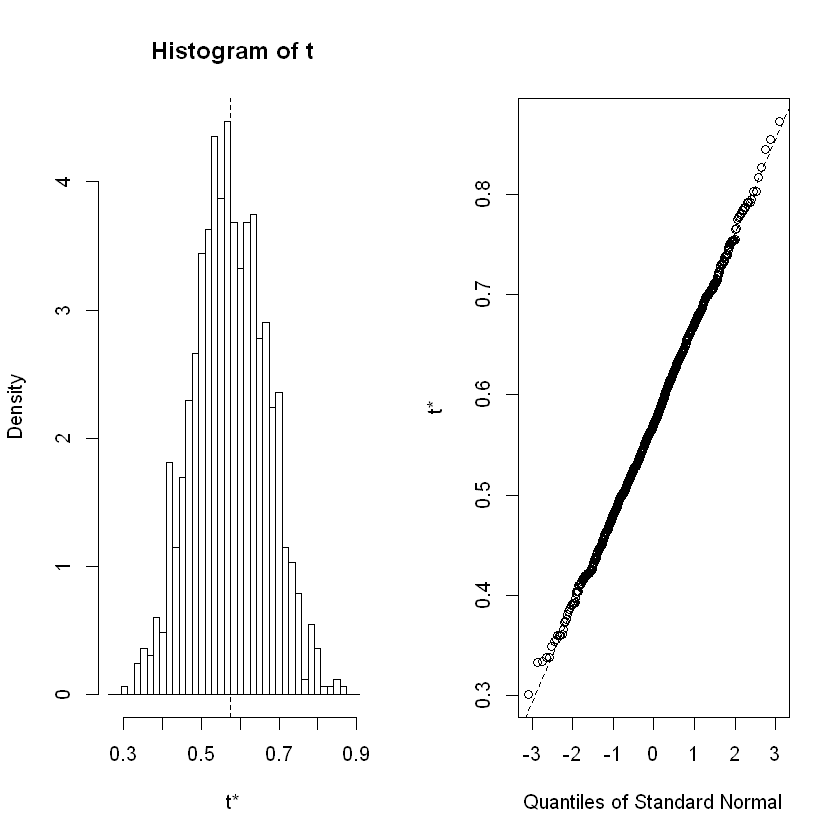

In [96]:
#plot bootstrap

#2nd plot == qqplot == plots ordered values against 
#order statistics of the Gaussian
plot(boot.out)